In [1]:
import glob
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from tqdm import tqdm
from torchvision.models import squeezenet1_1, resnet50, densenet121
from torch.utils.data import TensorDataset, DataLoader
from preprocessing_pipeline import get_data

In [ ]:
# TODO: Fix print statements in training loops
# TODO: Include time elapsed
# TODO: Graph training accuracy vs time elapsed training
# TODO: Include MobileNet

In [2]:
# set number of classes to 10 for baseline performance comparison
num_classes = 10
# 20 training epochs
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
train_data, test_data = get_data(num_classes=num_classes)

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

100%|██████████| 40000/40000 [05:17<00:00, 125.96it/s]


In [4]:
squeezenet_model = squeezenet1_1(weights='DEFAULT')
# redefine networks final classifier
squeezenet_model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=1)
squeezenet_model.num_classes = num_classes
# send to gpu
squeezenet_model = squeezenet_model.to(device)


squeeze_loss_fn = nn.CrossEntropyLoss()
squeeze_optimizer = torch.optim.Adam(params=squeezenet_model.parameters(), lr = 1e-5)

# initialize training loss
squeeze_training_loss = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = squeezenet_model(b_x)
        loss = squeeze_loss_fn(y_pred, b_y)
        
        squeeze_optimizer.zero_grad()
        loss.backward()
        squeeze_optimizer.step()

        
        if i % 5000 == 0:
            squeeze_training_loss.append(loss.item())
            print(f"Batch: {i} / Epoch: {epoch} / Loss: {loss.item():.4f}")

Epoch 1/20
Batch: 0 / Epoch: 0 / Loss: 5.1727
Epoch 2/20
Batch: 0 / Epoch: 1 / Loss: 1.5659
Epoch 3/20
Batch: 0 / Epoch: 2 / Loss: 1.0390
Epoch 4/20
Batch: 0 / Epoch: 3 / Loss: 1.0198
Epoch 5/20
Batch: 0 / Epoch: 4 / Loss: 0.7121
Epoch 6/20
Batch: 0 / Epoch: 5 / Loss: 0.9305
Epoch 7/20
Batch: 0 / Epoch: 6 / Loss: 0.3702
Epoch 8/20
Batch: 0 / Epoch: 7 / Loss: 0.3821
Epoch 9/20
Batch: 0 / Epoch: 8 / Loss: 0.3585
Epoch 10/20
Batch: 0 / Epoch: 9 / Loss: 0.4462
Epoch 11/20
Batch: 0 / Epoch: 10 / Loss: 0.4774
Epoch 12/20
Batch: 0 / Epoch: 11 / Loss: 0.4773
Epoch 13/20
Batch: 0 / Epoch: 12 / Loss: 0.2043
Epoch 14/20
Batch: 0 / Epoch: 13 / Loss: 0.4612
Epoch 15/20
Batch: 0 / Epoch: 14 / Loss: 0.1193
Epoch 16/20
Batch: 0 / Epoch: 15 / Loss: 0.4353
Epoch 17/20
Batch: 0 / Epoch: 16 / Loss: 0.1511
Epoch 18/20
Batch: 0 / Epoch: 17 / Loss: 0.1324
Epoch 19/20
Batch: 0 / Epoch: 18 / Loss: 0.0643
Epoch 20/20
Batch: 0 / Epoch: 19 / Loss: 0.1702


In [5]:
resnet_model = resnet50(weights='DEFAULT')
# get number of in_features from source
num_features = resnet_model.fc.in_features
# redefine the networks final fully connected layer
resnet_model.fc = nn.Linear(num_features, num_classes)
# send to gpu
resnet_model = resnet_model.to(device)


res_loss_fn = nn.CrossEntropyLoss()
res_optimizer = torch.optim.Adam(params=resnet_model.parameters(), lr = 1e-5)

# initialize training loss
res_training_loss = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = resnet_model(b_x)
        loss = res_loss_fn(y_pred, b_y)
        
        res_optimizer.zero_grad()
        loss.backward()
        res_optimizer.step()

        
        if i % 5000 == 0:
            res_training_loss.append(loss.item())
            print(f"Batch: {i} / Epoch: {epoch} / Loss: {loss.item():.4f}")

Epoch 1/20
Batch: 0 / Epoch: 0 / Loss: 2.3688
Epoch 2/20
Batch: 0 / Epoch: 1 / Loss: 1.0029
Epoch 3/20
Batch: 0 / Epoch: 2 / Loss: 0.1133
Epoch 4/20
Batch: 0 / Epoch: 3 / Loss: 0.1300
Epoch 5/20
Batch: 0 / Epoch: 4 / Loss: 0.2234
Epoch 6/20
Batch: 0 / Epoch: 5 / Loss: 0.1732
Epoch 7/20
Batch: 0 / Epoch: 6 / Loss: 0.0432
Epoch 8/20
Batch: 0 / Epoch: 7 / Loss: 0.0217
Epoch 9/20
Batch: 0 / Epoch: 8 / Loss: 0.0041
Epoch 10/20
Batch: 0 / Epoch: 9 / Loss: 0.0635
Epoch 11/20
Batch: 0 / Epoch: 10 / Loss: 0.0382
Epoch 12/20
Batch: 0 / Epoch: 11 / Loss: 0.0044
Epoch 13/20
Batch: 0 / Epoch: 12 / Loss: 0.0021
Epoch 14/20
Batch: 0 / Epoch: 13 / Loss: 0.0009
Epoch 15/20
Batch: 0 / Epoch: 14 / Loss: 0.0066
Epoch 16/20
Batch: 0 / Epoch: 15 / Loss: 0.0241
Epoch 17/20
Batch: 0 / Epoch: 16 / Loss: 0.0004
Epoch 18/20
Batch: 0 / Epoch: 17 / Loss: 0.0032
Epoch 19/20
Batch: 0 / Epoch: 18 / Loss: 0.0200
Epoch 20/20
Batch: 0 / Epoch: 19 / Loss: 0.0012


In [6]:
densenet_model = densenet121(weights='DEFAULT')
# get number of in features from source
num_features = densenet_model.classifier.in_features
# redefine the networks final fully connected layer
densenet_model.classifier = nn.Linear(num_features, num_classes)
# send to gpu
densenet_model = densenet_model.to(device)


dense_loss_fn = nn.CrossEntropyLoss()
dense_optimizer = torch.optim.Adam(params=densenet_model.parameters(), lr = 1e-5)

# initialize training loss
dense_training_loss = []


for epoch in range(num_epochs):
    for i, (b_x, b_y) in enumerate(train_dataloader):
        # load data to gpu
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        
        y_pred = densenet_model(b_x)
        loss = dense_loss_fn(y_pred, b_y)
        
        dense_optimizer.zero_grad()
        loss.backward()
        dense_optimizer.step()

        # progress_bar.update(1)
        
        if i % 5000 == 0:
            dense_training_loss.append(loss.item())
            print(f"Epoch: {epoch+1}/{num_epochs} --- Training Loss: {loss.item():.4f} --- Training Accuracy: ")

Epoch 1/20
Batch: 0 / Epoch: 0 / Loss: 2.5389 
Epoch 2/20
Batch: 0 / Epoch: 1 / Loss: 0.8772 
Epoch 3/20
Batch: 0 / Epoch: 2 / Loss: 0.2395 
Epoch 4/20
Batch: 0 / Epoch: 3 / Loss: 0.1297 
Epoch 5/20
Batch: 0 / Epoch: 4 / Loss: 0.1323 
Epoch 6/20
Batch: 0 / Epoch: 5 / Loss: 0.0439 
Epoch 7/20
Batch: 0 / Epoch: 6 / Loss: 0.0634 
Epoch 8/20
Batch: 0 / Epoch: 7 / Loss: 0.0456 
Epoch 9/20
Batch: 0 / Epoch: 8 / Loss: 0.0196 
Epoch 10/20
Batch: 0 / Epoch: 9 / Loss: 0.2105 
Epoch 11/20
Batch: 0 / Epoch: 10 / Loss: 0.0425 
Epoch 12/20
Batch: 0 / Epoch: 11 / Loss: 0.2249 
Epoch 13/20
Batch: 0 / Epoch: 12 / Loss: 0.0014 
Epoch 14/20
Batch: 0 / Epoch: 13 / Loss: 0.0014 
Epoch 15/20
Batch: 0 / Epoch: 14 / Loss: 0.0056 
Epoch 16/20
Batch: 0 / Epoch: 15 / Loss: 0.0013 
Epoch 17/20
Batch: 0 / Epoch: 16 / Loss: 0.0221 
Epoch 18/20
Batch: 0 / Epoch: 17 / Loss: 0.0066 
Epoch 19/20
Batch: 0 / Epoch: 18 / Loss: 0.0032 
Epoch 20/20
Batch: 0 / Epoch: 19 / Loss: 0.0070 


In [7]:
# custom accuracy computation, optionally displays predictions
def validate(model, data, display_pred = False):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.to(device)
        labels = labels.to(device)
        
        x = model(images)
        value, pred = torch.max(x, 1)
        
        total += x.size(0)
        correct += torch.sum(pred == labels)
        
        if i % 1000 == 0 & display_pred == True:
            print(f"Pred: {x} / True: {labels}")
    return correct / total

In [11]:
print(f"SqueezeNet test accuracy: {validate(squeezenet_model, test_dataloader).item():.4f}")
print(f"ResNet50 test accuracy: {validate(resnet_model, test_dataloader).item():.4f}")
print(f"DenseNet121 test accuracy: {validate(densenet_model, test_dataloader).item():.4f}")

SqueezeNet test accuracy: 0.9038
ResNet50 test accuracy: 0.9763
DenseNet121 test accuracy: 0.9774


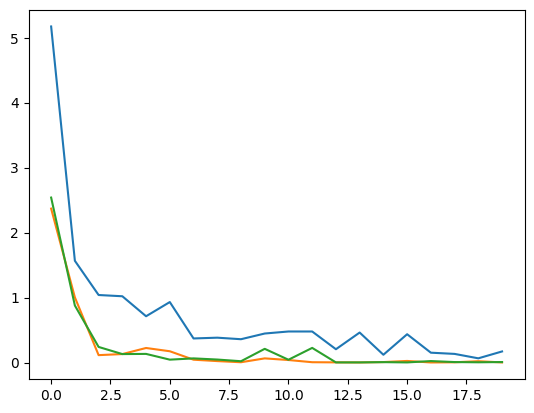

In [13]:
plt.plot(squeeze_training_loss)
plt.plot(res_training_loss)
plt.plot(dense_training_loss)